<a href="https://colab.research.google.com/github/iLuisOlivares/OpenCV-IA/blob/main/Software_libre_Corte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificador de Fresas y Uchuvas 🍓

Crear un clasificador que tenga como etiquetas: uchuvas y fresas.
Tener en cuenta los siguientes requisitos:

* Reunir 25 imagenes de fresas y 25 de uchuvas.

* Implementar un clasificador con KNN y otro con Regresión Logística.

* Comparar los dos modelos y determinar cual es más preciso.

* Hacer la prueba con nuevas fotos: uchuva, manzana y cereza (Usando
el mejor clasificador).

* Dibujar sobre las imagenes de prueba un cuadro y un texto indicando
la fruta clasificada.

* Aplicar el modelo de clustering con detección de colores sobre
una de las imágenes del dataset.

# Importar librerias


In [ ]:
#Importar librerias 

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Preparando los datos de prueba 

*   ### Importar Imagenes
*   ### Aplanar Imagenes




In [ ]:
#Creando listas con los nombres

fresas=[*range(1,26,1)]
uchuvas=[*range(1,26,1)]
fresas=["fresas"+str(s)+".jpg" for s in fresas]
uchuvas=["Uchuvas"+str(s)+".jpg" for s in uchuvas]

#Uniendo la lista de imágenes
imagenes=fresas+uchuvas
#listado de etiquetas
etiquetas=[0]*25+[1]*25
x = []
y = []
#Escalamos las imagenes a 200 pix ancho y 200 pix alto
for i in range(len(imagenes)):
  img = cv2.imread("/content/drive/MyDrive/Software_libre/dataset_frutas2/"+imagenes[i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_rs=cv2.resize(img, (200,200))
  x.append(img_rs)
  y.append(etiquetas[i])

Text(0.5, 1.0, 'Uchuvas1.jpg')

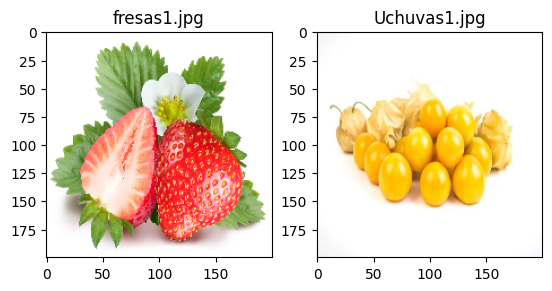

In [ ]:
plt.subplot(1,2,1)
plt.imshow(x[0], cmap = 'Accent')
plt.title(imagenes[0])
plt.subplot(1,2,2)
plt.imshow(x[25], cmap = 'Accent')
plt.title(imagenes[25])

In [ ]:
#Aplanando conjunto de entrenamiento
x = np.array(x)
y = np.array(y)
print(x.shape)

x= x.reshape(50, 200*200*3)
print(x)
print(x.shape)


(50, 200, 200, 3)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [254 254 254 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(50, 120000)


In [ ]:
#Cargar modelo Haarcascade de fresas y uchuvas

uchuvas_cascade = cv2.CascadeClassifier("cascade_uchuvas.xml")
fresas_cascade = cv2.CascadeClassifier("cascade_fresas_5.3.xml")

# Funciones

In [ ]:
# Funciones

# Mostrar la informacion del modelo, las predicciones, matriz de confusion y la precision
def modelInformation(model,name,y_test):

  y_pred=model.predict(x_test)
  print(f"\nPredicciones del modelo {name}: ",y_pred)
  print("Valores de prueba esperados: ", y_test)

  #Matriz de confusion 
  matriz=confusion_matrix(y_test,y_pred)
  print(f"\nMatriz de Confusión del modelo {name}: ")
  print(matriz)

  #Calculo de la precision del modelo 
  prec=precision_score(y_test,y_pred, average=None)
  print(f'\nPrecisión del modelo por clase: {prec}')
  print(f'Precisión prom del modelo {prec.mean()}')

  #Calculo de la exactitud del modelo
  exac=accuracy_score(y_test,y_pred)
  print(f'exactitud del modelo: {exac}')


#Para probar el modelo con una imagen de entrada cargada por CV2 y el model, ya sea KNN o Regresion logistica
def pruebaModelo(img_test,model):
  
  img_test=cv2.resize(img_test, (200,200))

  #Redimensionamos la imagen
  img_test_rd=img_test.reshape(1,200*200*3)

  pred=model.predict(img_test_rd)

  result = ''
  if(pred[0]==0):
    result = "Es fresa"
  else:
    result = "Es uchuva"

  print(result)
  return pred[0]

#Dibujar el rectangulo al rededor de la fruta usando haarcascade
def drawRectangle(result, img_test):
  
  img_cv = imutils.resize(img_test, width=300, height=300)
  img_copy = np.copy(img_cv)
  if(result==0):
    fruits = fresas_cascade.detectMultiScale(img_copy,1.1,3)
    print(fruits)
    for i in range(len(fruits)):
      x,y,w,h = fruits[i]
      cv2.rectangle(img_copy, (x,y),(x+w,y+h), (128,0,0), 3)
      cv2.putText(img_copy, "Fresas", (x,y-10) , cv2.FONT_HERSHEY_SIMPLEX, 2, (250,0,15), 1, cv2.LINE_AA)
    result = "Es fresa"
  else:
    fruits = uchuvas_cascade.detectMultiScale(img_copy,1.1,3)
    print(fruits)
    for i in range(len(fruits)):
      x,y,w,h = fruits[i]
      cv2.rectangle(img_copy, (x,y),(x+w,y+h), (251,227,35), 1)
      cv2.putText(img_copy, "Uchuvas", (x,y-10) , cv2.FONT_HERSHEY_SIMPLEX, 1, (251,227,35), 1, cv2.LINE_AA)
    result = "Es uchuva"
  
  plt.title(result)
  plt.imshow(img_copy, cmap = 'Accent')
  plt.show()

def clasificador(img,model):
  #Leer la imagen con cv2
  img_test = cv2.imread(img)
  print(img_test.shape)
  img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
  result = pruebaModelo(img_test, model)
  drawRectangle(result,img_test)



def deteccionColores(img):
  #subir imagen
  img_p = cv2.imread(img)
  img_p = cv2.cvtColor(img_p, cv2.COLOR_BGR2RGB)

  #Obtener los tamaños de la imagen
  w, h, c = img_p.shape

  #Aplanar la imagen
  img_fl = img_p.reshape(w*h,c)


  #Ajustar el modelo Kmeans
  km = KMeans(n_clusters=3)
  km.fit(img_fl)
    
  print("\nCluster:\n",km.cluster_centers_)

  #Labels del valor correspondiente
  lb = km.labels_
  #Reajustar el tamaño del label
  mat_lb=lb.reshape(w,h)

  #Volvemos la imagena una copia numpy
  img_copy = np.copy(img_p)
  color1, color2, color3 = km.cluster_centers_

  #Asignar los respectivos colores
  mask1 = mat_lb == 0
  mask2 = mat_lb == 1
  mask3 = ~(mask1 | mask2)

  img_copy[mask1] = color1
  img_copy[mask2] = color2
  img_copy[mask3] = color3

  tam = w * h
  c1=(len(img_copy[mask1])/tam)*100
  c2=(len(img_copy[mask2])/tam)*100
  c3=(len(img_copy[mask3])/tam)*100
  print(f'\nPorcentajes:\n%color 1: {c1}\n%color 2: {c2}\n%color 3: {c3}')

  return img_copy




# Datos de entrenamiento y prueba

In [ ]:
# Generar datos que seran de entrenamiento y de prueba para ambos modelos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
x_train.shape

(40, 120000)

# KNeighbors

In [ ]:
#Creamos el clasificador
model_kn = KNeighborsClassifier(n_neighbors=3)
#Entrenando con el 80% de los dato
model_kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
modelInformation(model_kn,"KNeighborsClassifier",y_test)


Predicciones del modelo KNeighborsClassifier:  [0 0 0 0 1 1 1 0 1 1]
Valores de prueba esperados:  [0 0 0 0 1 0 1 0 1 0]

Matriz de Confusión del modelo KNeighborsClassifier: 
[[5 2]
 [0 3]]

Precisión del modelo por clase: [1.  0.6]
Precisión prom del modelo 0.8
exactitud del modelo: 0.8


(450, 450, 3)
Es fresa
[[104 121 182 179]]


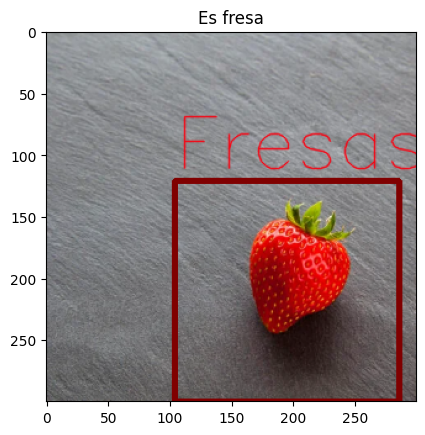

In [ ]:
#Prueba del modelo
# clasificador("/content/drive/MyDrive/Software_libre/dataset_frutas2/prueba3.jpg",model_kn)
clasificador("fresas.webp",model_kn)


# Regresion Logistica

In [ ]:
# Crear modelo de regresion logistica
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Info del modelo
modelInformation(model_lr,"LogisticRegression",y_test)


Predicciones del modelo LogisticRegression:  [0 0 0 0 1 1 1 0 1 0]
Valores de prueba esperados:  [0 0 0 0 1 0 1 0 1 0]

Matriz de Confusión del modelo LogisticRegression: 
[[6 1]
 [0 3]]

Precisión del modelo por clase: [1.   0.75]
Precisión prom del modelo 0.875
exactitud del modelo: 0.9


(233, 350, 3)
Es fresa
[[ 76  37 130 130]]


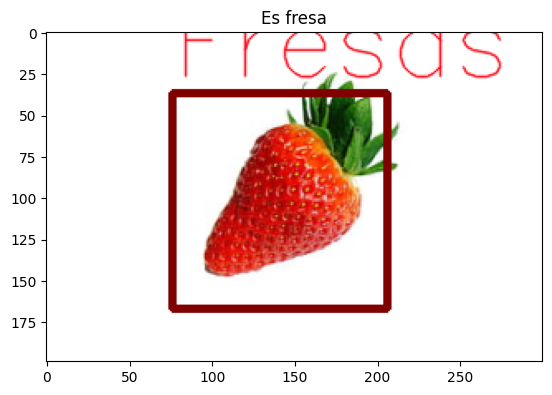

In [ ]:

clasificador("/content/drive/MyDrive/Software_libre/dataset_frutas2/fresas4.jpg",model_lr)



# Pruebas con el mejor modelo [Regresion logistica]

(490, 1140, 3)
Es uchuva
[[  2  22  58  58]
 [162  33  51  51]
 [203  13  83  83]
 [ 54  29  54  54]
 [105  31  57  57]
 [234  36  56  56]]


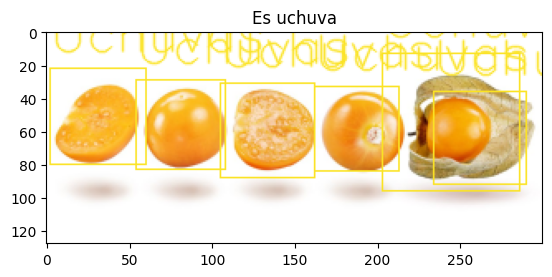

In [ ]:
#Prueba del modelo con una uchuva 
# clasificador("/content/drive/MyDrive/Software_libre/dataset_frutas2/prueba1.jpg",model_lr)
clasificador("uchu.jpg",model_lr)


(700, 700, 3)
Es fresa
[[ 47  67 207 207]]


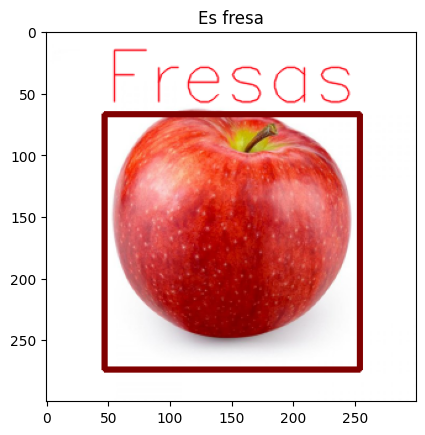

In [ ]:
#Prueba del modelo con una manzana
clasificador("/content/drive/MyDrive/Software_libre/dataset_frutas/manzana4.jpg",model_lr)


(700, 700, 3)
Es fresa
[[ 14  63 197 197]
 [219  78  75  75]
 [173 128  91  91]
 [ 61 175  46  46]
 [106 173  60  60]]


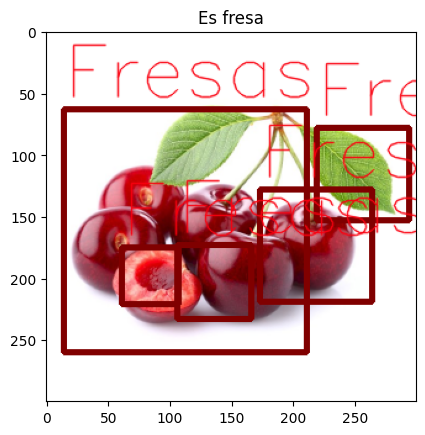

In [ ]:
#Prueba del modelo con una cereza 
clasificador("/content/drive/MyDrive/Software_libre/dataset_frutas2/cerise-burlat-large.jpg",model_lr)

# Modelo de clustering con detección de colores sobre una de las imágenes del dataset

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster:
 [[ 98.01425216  75.82147498  52.28118813]
 [223.44917624 154.68883389  26.58366557]
 [193.65644807 176.85513523 148.85381951]]

Porcentajes:
%color 1: 50.74645833333334
%color 2: 20.095416666666665
%color 3: 29.158125000000002


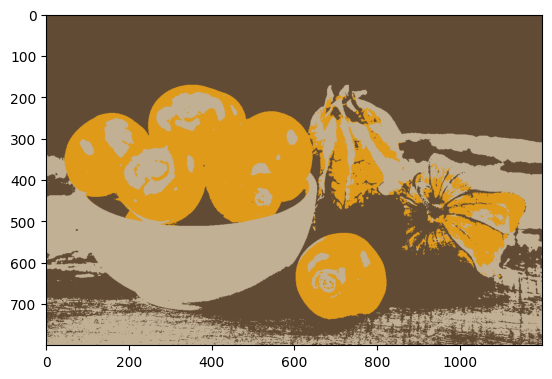

In [ ]:
img = deteccionColores("/content/drive/MyDrive/Software_libre/dataset_frutas2/prueba1.jpg")

plt.imshow(img, cmap='Accent')
plt.show()